In [1]:
import numpy
import pandas as pd
import numpy as np
from pgmpy.estimators import BdeuScore, K2Score, BicScore
from pgmpy.models import BayesianModel
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import BayesianEstimator, MaximumLikelihoodEstimator
import networkx as nx
import pandas as pd
import sklearn.metrics as metrics 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [12]:
def features(data):
       
#     data.loc[data.HEAP == 0.0, 'HEAP'] = 0
#     data.loc[data.HEAP != 0.0, 'HEAP'] = 1
    
#     data.loc[data.WIC == 0.0 ,'WIC'] = 0
#     data.loc[data.WIC != 0.0 ,'WIC'] = 1
    
#     data.loc[data.SchoolLunch == 0.0, 'SchoolLunch'] = 0
#     data.loc[data.SchoolLunch != 0.0, 'SchoolLunch'] = 1

#     data.loc[data.MOOP == 0.0, 'MOOP'] = 0
#     data.loc[data.MOOP != 0.0, 'MOOP'] = 1

#     data.loc[data.Childcare == 0.0, 'Childcare'] = 0
#     data.loc[data.Childcare != 0.0, 'Childcare'] = 1

#     data.loc[data.FoodStamps == 0.0, 'FoodStamps'] = 0
#     data.loc[data.FoodStamps != 0.0, 'FoodStamps'] = 1

#     data.loc[data.Commuting == 0.0, 'Commuting'] = 0
#     data.loc[data.Commuting != 0.0, 'Commuting'] = 1

#     data.loc[data.Housing == 0.0, 'Housing'] = 0
#     data.loc[data.Housing != 0.0, 'Housing'] = 1
    
    data = data.loc[:, [u'PovunitType',
                   u'CitizenStatus',
                  u'EducAttain',
                  u'HousingStatus',
                  u'AgeCateg_2',       
                  u'WorkersEquiv', u'MV', 
                   'Pov_risk']]
    
    data.PovunitType.replace({1:0, 2:1,3:2, 4:3,5:4, 6:5,7:6, 8:7}, inplace=True)
    data.MV.replace({1:0, 2:1,3:2, 4:3,5:4, 6:5,7:6}, inplace=True)
    data.HousingStatus.replace({1:0, 2:1,3:2, 4:3,5:4, 6:5,7:6, 8:7,9:8}, inplace=True)
    data.WorkersEquiv.replace({1:0, 2:1,3:2, 4:3,5:4}, inplace=True)
    data.EducAttain.replace({1:0, 2:1,3:2, 4:3}, inplace=True)
    data.CitizenStatus.replace({1:0, 2:1,3:2}, inplace=True)
    
    return data

In [ ]:
# thresholds = pd.Series(puma_05.CEO_Threshold.unique())

In [ ]:
# thresholds.hist(bins=35)
# plt.vlines(x=thresholds.median(), ymin=0, ymax=18, color = 'red')
# plt.vlines(x=thresholds.mean(), ymin=0, ymax=18, color = 'yellow')

In [ ]:
# puma_05[puma_05.CEO_Threshold == puma_05.CEO_Threshold.max()]

In [ ]:
# thresholds.describe()

In [ ]:
# thresholds.quantile(0.99)

In [ ]:
# thresholds_of = pd.Series(puma_05.Official_Threshold.unique())

In [ ]:
# thresholds_of.hist(bins=30)

# New check without aggregation

In [ ]:
# puma_05.CEO_Income.describe()

In [ ]:
# puma_05[puma_05.CEO_Income < 0]['PUMA'].hist()

In [ ]:
# puma_05[puma_05.SERIALNO == 812]

In [ ]:
# puma_05[puma_05.CEO_Income == 0]

In [ ]:
# puma_05.CEO_Income.quantile(0.1)

In [ ]:
# df[(df.CEO_Poverty == 1)&(df.CEO_Threshold < df.CEO_Income)][['CEO_Threshold', 'CEO_Income','CEO_Poverty', 'Pov_risk', 'Threshold1']]

In [ ]:
# df[(df.Pov_risk == 1)&((df.CEO_Poverty == 1))][['CEO_Threshold', 'CEO_Income','CEO_Poverty', 'Pov_risk', 'Threshold1']]

In [ ]:
# X = df[[ u'PovunitType', u'WorkExpIndiv', u'Povunit',
#         u'SchoolBreakfast', u'HEAP', u'CitizenStatus',
#         u'AgeCateg_2', u'AgeCateg_3', u'EducAttain',
#         u'WIC', u'HousingStatus',
#        u'WorkersEquiv', u'SchoolLunch', u'AgeCateg_1',
#        u'MOOP', u'MV', u'Childcare', 
#        u'NP', u'FoodStamps', u'Commuting',
#        u'Housing', 'Pov_risk']]

In [ ]:
# X.columns

# Making continuous variables discrete

In [ ]:
# print X.SchoolBreakfast.value_counts()
# X.SchoolBreakfast.hist()

In [ ]:
# print (X.HEAP).value_counts()
# X.HEAP.hist(bins= 50)

In [ ]:
# X.HEAP[X.HEAP == 0.0] = 0
# X.HEAP[X.HEAP != 0.0] = 1

In [ ]:
# X.HEAP.value_counts()

In [ ]:
# print X.WIC.value_counts()
# X.WIC.hist(bins=50)

In [ ]:
# X.WIC[X.WIC == 0.0] = 0
# X.WIC[X.WIC != 0.0] = 1

In [ ]:
# X.WIC.value_counts()

In [ ]:
# print X.SchoolLunch.value_counts()
# X.SchoolLunch.hist(bins = 100)

In [ ]:
# X.SchoolLunch[X.SchoolLunch == 0.0] = 0
# X.SchoolLunch[X.SchoolLunch != 0.0] = 1

In [ ]:
# X.SchoolLunch.value_counts()

In [ ]:
# print X.MOOP.describe()
# (X.MOOP).hist(bins = 100)

In [ ]:
# X.MOOP[X.MOOP == 0.0] = 0
# X.MOOP[X.MOOP != 0.0] = 1

In [ ]:
# X.MOOP.plot.box()

In [ ]:
# print X.Childcare.value_counts()
# X.Childcare.hist(log = True, bins=100)

In [ ]:
# X.Childcare[X.Childcare == 0.0] = 0
# X.Childcare[X.Childcare != 0.0] = 1

In [ ]:
# print X.FoodStamps.value_counts()
# X.FoodStamps.hist(bins=100, log = True)

In [ ]:
# np.sqrt(X.FoodStamps).hist(bins=100, log = True)

In [ ]:
# X.FoodStamps[X.FoodStamps == 0.0] = 0
# X.FoodStamps[X.FoodStamps != 0.0] = 1

In [ ]:
# X.FoodStamps.value_counts()

In [ ]:
# print X.Commuting.value_counts()
# X.Commuting.hist(log = True, bins=100)

In [ ]:
# X[(((X.Commuting - X.Commuting.mean()) / X.Commuting.std()) < 0) &
#   (((X.Commuting - X.Commuting.mean()) / X.Commuting.std()) >= -1)].Pov_risk.value_counts()

In [ ]:
# np.sqrt(X.Commuting).hist(bins= 100)

In [ ]:
# X[(np.sqrt(X.Commuting) < 10)].Pov_risk.value_counts()

In [ ]:
# X.Commuting[X.Commuting == 0.0] = 0
# X.Commuting[X.Commuting != 0.0] = 1

In [ ]:
# X.Housing.unique()
# X.Housing.hist()

In [ ]:
# X.Housing[X.Housing == 0.0] = 0
# X.Housing[X.Housing != 0.0] = 1

In [ ]:
# G = nx.DiGraph()
# G.add_edges_from(best_model.edges())
# nx.draw(G, with_labels=True, arrows=True, node_size=700)

# Bayes Net Updated Columns

In [ ]:
cols = ['WorkersEquiv', 'SchoolLunch', 'FoodStamps', 'MOOP', 
        'EducAttain', 'HousingStatus', 'HEAP', 'Pov_risk']

In [ ]:
puma_05 = pd.read_csv("../Data/Cleaned/puma_05.csv")
puma_05.drop(['Unnamed: 0'], axis=1, inplace=True)

X5 = features(puma_05)
X5 = X5.loc[:,cols] 

train5,test5=train_test_split(X5,random_state=9,test_size=0.20)
hc5 = HillClimbSearch(train5, scoring_method=BicScore(train5))
best_model5 = hc5.estimate()

In [ ]:
best_model5.edges()

In [ ]:
best_model5.fit(train5, estimator=BayesianEstimator, prior_type='BDeu', equivalent_sample_size=100)
test5 = test5.astype(int)
test5.reset_index(inplace=True, drop=True)

y_pred5 = best_model5.predict(test5.loc[:,[u'HEAP', u'HousingStatus', u'WorkersEquiv', u'SchoolLunch', u'MOOP',
       u'EducAttain', u'FoodStamps']])

In [ ]:
((y_pred5.Pov_risk == test5.Pov_risk).sum()*1.0)/len(test5)

In [ ]:
metrics.confusion_matrix(test5.Pov_risk, y_pred5.Pov_risk)

In [ ]:
metrics.precision_score(test5.Pov_risk, y_pred5.Pov_risk, average='weighted')

In [ ]:
metrics.recall_score(test5.Pov_risk, y_pred5.Pov_risk, average='weighted')

In [ ]:
puma_06 = pd.read_csv("../Data/Cleaned/puma_06.csv")
puma_06.drop(['Unnamed: 0'], axis=1, inplace=True)

X6 = features(puma_06)
X6 = X6.loc[:,cols]
X6.dropna(inplace=True)

train6,test6=train_test_split(X6,random_state=9,test_size=0.20)
hc6 = HillClimbSearch(train6, scoring_method=BicScore(train6))
best_model6 = hc6.estimate()

In [ ]:
best_model6.edges()

In [ ]:
best_model6.fit(train6, estimator=BayesianEstimator, prior_type='BDeu', equivalent_sample_size=100)
test6 = test6.astype(int)
test6.reset_index(inplace=True, drop=True)

y_pred6 = best_model6.predict(test6.loc[:,[u'HEAP', u'HousingStatus', u'WorkersEquiv', u'SchoolLunch', u'MOOP',
       u'EducAttain', u'FoodStamps']])

In [ ]:
((y_pred6.Pov_risk == test6.Pov_risk).sum()*1.0)/len(test6)

In [ ]:
metrics.confusion_matrix(test6.Pov_risk, y_pred6.Pov_risk )

In [ ]:
metrics.precision_score(test6.Pov_risk, y_pred6.Pov_risk, average='weighted')

In [ ]:
metrics.recall_score(test6.Pov_risk, y_pred6.Pov_risk, average='weighted')

In [ ]:
puma_07 = pd.read_csv("../Data/Cleaned/puma_07.csv")
puma_07.drop(['Unnamed: 0'], axis=1, inplace=True)

X7 = features(puma_07)
X7 = X7.loc[:,cols] 

train7,test7=train_test_split(X7,random_state=9,test_size=0.20)
hc7 = HillClimbSearch(train7, scoring_method=BicScore(train7))
best_model7 = hc7.estimate()

In [ ]:
best_model7.edges()

In [ ]:
best_model7.fit(train7, estimator=BayesianEstimator, prior_type='BDeu', equivalent_sample_size=100)
test7 = test7.astype(int)
test7.reset_index(inplace=True, drop=True)

y_pred7 = best_model7.predict(test7.loc[:,[u'HEAP', u'HousingStatus', u'WorkersEquiv', u'SchoolLunch', u'MOOP',
       u'EducAttain', u'FoodStamps']])

In [ ]:
((y_pred7.Pov_risk == test7.Pov_risk).sum()*1.0)/len(test7)

In [ ]:
puma_08 = pd.read_csv("../Data/Cleaned/puma_08.csv")
puma_08.drop(['Unnamed: 0'], axis=1, inplace=True)

X8 = features(puma_08)
X8 = X8.loc[:,cols] 

train8,test8=train_test_split(X8,random_state=9,test_size=0.20)
hc8 = HillClimbSearch(train8, scoring_method=BicScore(train8))
best_model8 = hc8.estimate()

In [ ]:
best_model8.edges()

In [ ]:
best_model8.fit(train8, estimator=BayesianEstimator, prior_type='BDeu', equivalent_sample_size=100)
test8 = test8.astype(int)
test8.reset_index(inplace=True, drop=True)

y_pred8 = best_model8.predict(test8.loc[:,[u'HEAP', u'HousingStatus', u'WorkersEquiv', u'SchoolLunch', u'MOOP',
       u'EducAttain', u'FoodStamps']])

In [ ]:
((y_pred8.Pov_risk == test8.Pov_risk).sum()*1.0)/len(test8)

In [ ]:
puma_09 = pd.read_csv("../Data/Cleaned/puma_09.csv")
puma_09.drop(['Unnamed: 0'], axis=1, inplace=True)

X9 = features(puma_09)
X9 = X9.loc[:,cols] 

train9,test9=train_test_split(X9,random_state=9,test_size=0.20)
hc9 = HillClimbSearch(train9, scoring_method=BicScore(train9))
best_model9 = hc9.estimate()

In [ ]:
best_model9.edges()

In [ ]:
best_model9.fit(train9, estimator=BayesianEstimator, prior_type='BDeu', equivalent_sample_size=100)
test9 = test9.astype(int)
test9.reset_index(inplace=True, drop=True)

y_pred9 = best_model9.predict(test9.loc[:,[u'HEAP', u'HousingStatus', u'WorkersEquiv', u'SchoolLunch', u'MOOP',
       u'EducAttain', u'FoodStamps']])

In [ ]:
((y_pred9.Pov_risk == test9.Pov_risk).sum()*1.0)/len(test9)

In [ ]:
puma_10 = pd.read_csv("../Data/Cleaned/puma_10.csv")
puma_10.drop(['Unnamed: 0'], axis=1, inplace=True)

X10 = features(puma_10)
X10 = X10.loc[:,cols] 

train10,test10=train_test_split(X10,random_state=9,test_size=0.20)
hc10 = HillClimbSearch(train10, scoring_method=BicScore(train10))
best_model10 = hc10.estimate()

In [ ]:
best_model10.edges()

In [ ]:
best_model10.fit(train10, estimator=BayesianEstimator, prior_type='BDeu', equivalent_sample_size=100)
test10 = test10.astype(int)
test10.reset_index(inplace=True, drop=True)

y_pred10 = best_model10.predict(test10.loc[:,[u'HEAP', u'HousingStatus', u'WorkersEquiv', u'SchoolLunch', u'MOOP',
       u'EducAttain', u'FoodStamps']])

In [ ]:
((y_pred10.Pov_risk == test10.Pov_risk).sum()*1.0)/len(test10)

In [ ]:
puma_11 = pd.read_csv("../Data/Cleaned/puma_11.csv")
puma_11.drop(['Unnamed: 0'], axis=1, inplace=True)

X11 = features(puma_11)
X11 = X11.loc[:,cols] 

train11,test11=train_test_split(X11,random_state=9,test_size=0.20)
hc11 = HillClimbSearch(train11, scoring_method=BicScore(train11))
best_model11 = hc11.estimate()

In [ ]:
best_model11.edges()

In [ ]:
best_model11.fit(train11, estimator=BayesianEstimator, prior_type='BDeu', equivalent_sample_size=100)
test11 = test11.astype(int)
test11.reset_index(inplace=True, drop=True)

y_pred11 = best_model11.predict(test11.loc[:,[u'HEAP', u'HousingStatus', u'WorkersEquiv', u'SchoolLunch', u'MOOP',
       u'EducAttain', u'FoodStamps']])

In [ ]:
((y_pred11.Pov_risk == test11.Pov_risk).sum()*1.0)/len(test11)

In [ ]:
puma_12 = pd.read_csv("../Data/Cleaned/puma_12.csv")
puma_12.drop(['Unnamed: 0'], axis=1, inplace=True)

X12 = features(puma_12)
X12 = X12.loc[:,cols] 

train12,test12=train_test_split(X12,random_state=9,test_size=0.20)
hc12 = HillClimbSearch(train12, scoring_method=BicScore(train12))
best_model12 = hc12.estimate()

In [ ]:
best_model12.edges()

In [ ]:
best_model12.fit(train12, estimator=BayesianEstimator, prior_type='BDeu', equivalent_sample_size=100)
test12 = test12.astype(int)
test12.reset_index(inplace=True, drop=True)

y_pred12 = best_model12.predict(test12.loc[:,[u'HEAP', u'HousingStatus', u'WorkersEquiv', u'SchoolLunch', u'MOOP',
       u'EducAttain', u'FoodStamps']])

In [ ]:
((y_pred12.Pov_risk == test12.Pov_risk).sum()*1.0)/len(test12)

In [ ]:
puma_13 = pd.read_csv("../Data/Cleaned/puma_13.csv")
puma_13.drop(['Unnamed: 0'], axis=1, inplace=True)

X13 = features(puma_13)
X13 = X13.loc[:,cols] 

train13,test13=train_test_split(X13,random_state=9,test_size=0.20)
hc13 = HillClimbSearch(train13, scoring_method=BicScore(train13))
best_model13 = hc13.estimate()

In [ ]:
best_model13.edges()

In [ ]:
best_model13.fit(train13, estimator=BayesianEstimator, prior_type='BDeu', equivalent_sample_size=100)
test13 = test13.astype(int)
test13.reset_index(inplace=True, drop=True)

y_pred13 = best_model13.predict(test13.loc[:,[u'HEAP', u'HousingStatus', u'WorkersEquiv', u'SchoolLunch', u'MOOP',
       u'EducAttain', u'FoodStamps']])

In [ ]:
((y_pred13.Pov_risk == test13.Pov_risk).sum()*1.0)/len(test13)

In [13]:
puma_14 = pd.read_csv("../Data/Cleaned/puma_14.csv")
puma_14.drop(['Unnamed: 0'], axis=1, inplace=True)

X14 = features(puma_14)
X14.AgeCateg_2.replace({1:0, 2:1,3:2, 4:3,5:4, 6:5,7:6, 8:7,9:8,10:9,11:10,12:11,13:12,14:13,15:14}, inplace=True) 

train14,test14=train_test_split(X14,random_state=9,test_size=0.20)
hc14 = HillClimbSearch(train14, scoring_method=BicScore(train14))
best_model14 = hc14.estimate()

In [14]:
best_model14.edges()

[('Pov_risk', u'WorkersEquiv'),
 ('Pov_risk', u'CitizenStatus'),
 ('Pov_risk', u'HousingStatus'),
 (u'HousingStatus', u'MV'),
 (u'PovunitType', u'WorkersEquiv'),
 (u'PovunitType', 'Pov_risk'),
 (u'PovunitType', u'EducAttain'),
 (u'PovunitType', u'AgeCateg_2'),
 (u'WorkersEquiv', u'HousingStatus'),
 (u'MV', u'CitizenStatus'),
 (u'EducAttain', 'Pov_risk')]

In [15]:
test14.columns

Index([  u'PovunitType', u'CitizenStatus',    u'EducAttain', u'HousingStatus',
          u'AgeCateg_2',  u'WorkersEquiv',            u'MV',      u'Pov_risk'],
      dtype='object')

In [17]:
best_model14.fit(train14, estimator=BayesianEstimator, prior_type='BDeu', equivalent_sample_size=100)
test14 = test14.astype(int)
test14.reset_index(inplace=True, drop=True)

y_pred14 = best_model14.predict(test14.loc[:,[u'PovunitType', u'CitizenStatus',    u'EducAttain', u'HousingStatus',
          u'AgeCateg_2',  u'WorkersEquiv',  u'MV']])

In [18]:
((y_pred14.Pov_risk == test14.Pov_risk).sum()*1.0)/len(test14)

0.67017477917684642

In [19]:
print metrics.classification_report(y_pred14.Pov_risk, test14.Pov_risk, target_names=['Poor', 'At_Risk', 'Not_Poor'])

             precision    recall  f1-score   support

       Poor       0.42      0.52      0.46       850
    At_Risk       0.29      0.46      0.36       725
   Not_Poor       0.89      0.75      0.81      3746

avg / total       0.73      0.67      0.69      5321



/home/cusp/vys217/.conda/envs/JVEvys217/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/cusp/vys217/.conda/envs/JVEvys217/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/cusp/vys217/.conda/envs/JVEvys217/lib/python2.7/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/cusp/vys217/.conda/envs/JVEvys217/lib/python2.7/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hol

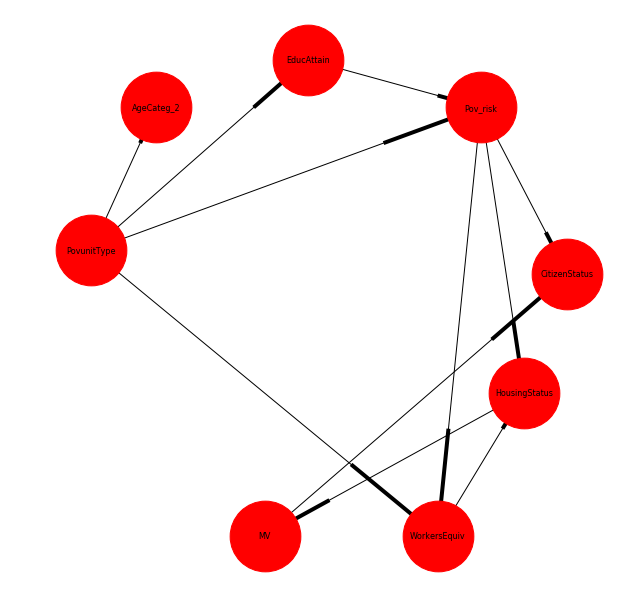

In [20]:
fig = plt.figure(figsize=(8,8))
# ax = fig.add_
G = nx.DiGraph()
G.add_edges_from(best_model14.edges())
pos = {u'PovunitType':(-100,20), u'CitizenStatus':(120,10), u'EducAttain':(0, 100) , u'HousingStatus':(100,-40), u'AgeCateg_2':(-70,80),
       u'WorkersEquiv':(60,-100), u'MV':(-20,-100), u'Pov_risk':(80,80)}
nx.draw(G, pos=pos, with_labels=True,  arrows=True, font_size = 8, node_size=5000)